In [1]:
import numpy as np

In [2]:
from src.lib.model import model
from src.lib.activation_functions import ReLu, softmax
from src.lib.layers import Dense, flatten
from src.lib.loss_functions import CrossEntropy
from src.lib.trainer import trainer

In [3]:
import numpy as np

# Générer N vecteurs 4D avec 0 ou 1
N = 10000  # nombre d'exemples
X = np.random.randint(0, 2, size=(N, 4))

# Calculer les targets
# XOR entre 1er et 2e élément
xor_part = np.logical_xor(X[:, 0], X[:, 1]).astype(int)

# AND entre 3e et 4e élément
and_part = np.logical_and(X[:, 2], X[:, 3]).astype(int)

# OR entre les deux résultats
y = np.logical_or(xor_part, and_part).astype(int)
# One-hot encoding
y_onehot = np.zeros((N, 2))
y_onehot[np.arange(N), y] = 1


In [4]:
layer1 = Dense(4, 3)
layer2 = ReLu()
layer3 = Dense(3, 2)
layer4 = softmax()
layer5 = CrossEntropy(2)

In [5]:
layer1.initialise_weights()
layer3.initialise_weights()
layer5.target = [[0,1]]

In [6]:
model1 = model([layer1, layer2, layer3, layer4, layer5])

In [7]:
train = trainer(model1, X, y_onehot)

In [8]:
model1.forward(np.array([[1, 2, 3, 4]]))

(array([[0.5, 0.5]]), 0.6931471805599453)

In [9]:
#train.train(nb_epochs=100)

In [10]:
model1.layers[0].weights

array([[ 0.31262311,  0.20251816,  0.24070563],
       [ 0.17735032, -0.54740829, -0.08558153],
       [-1.38296107, -0.69357902,  0.02692367],
       [-0.94868451, -0.19884166, -0.35971625]])

In [11]:
# 1. Générer nouveaux inputs
X_new = np.random.randint(0, 2, size=(N, 4))

# 2. Forward pass
predictions = model1.predict(X_new)

# 3. Trouver classe prédite
predicted_classes = np.argmax(predictions, axis=1)

# 4. Calculer vraie target logique
xor_part = np.logical_xor(X_new[:, 0], X_new[:, 1]).astype(int)
and_part = np.logical_and(X_new[:, 2], X_new[:, 3]).astype(int)
y_true = np.logical_or(xor_part, and_part).astype(int)

# 5. Comparaison
print("Predicted :", predicted_classes)
print("True      :", y_true)
print(f"Test Accuracy: {np.mean(predicted_classes == y_true)*100:.2f}%")


Predicted : [0 0 1 ... 0 0 1]
True      : [1 1 1 ... 1 1 1]
Test Accuracy: 50.44%


In [12]:
model1.layers[0].weights

array([[ 0.31262311,  0.20251816,  0.24070563],
       [ 0.17735032, -0.54740829, -0.08558153],
       [-1.38296107, -0.69357902,  0.02692367],
       [-0.94868451, -0.19884166, -0.35971625]])

In [13]:
from src.parser import load_mnist_images, load_mnist_labels
import matplotlib.pyplot as plt

In [14]:
images_file = "data/mnist/train-images.idx3-ubyte"
label_file = "data/mnist/train-labels.idx1-ubyte"

In [15]:
images_train = load_mnist_images(images_file)
labels_train = load_mnist_labels(label_file)

In [16]:
images_file = "data/mnist/t10k-images.idx3-ubyte"
label_file = "data/mnist/t10k-labels.idx1-ubyte"

In [17]:
images = load_mnist_images(images_file)
labels = load_mnist_labels(label_file)

In [18]:
from tensorflow.keras.datasets import mnist
import numpy as np

# Charger MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Nombre de classes dans MNIST
num_classes = 10

# Fonction pour one-hot encoder
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

# Utilisation
y_train_encoded = one_hot_encode(y_train, num_classes)
y_test_encoded = one_hot_encode(y_test, num_classes)

print(y_train_encoded.shape)  # (60000, 10)
print(y_test_encoded.shape)   # (10000, 10)



(60000, 10)
(10000, 10)


In [27]:
model_mnist = model([flatten(), Dense(784, 128, initialisation='he'), ReLu(), Dense(128, 10, initialisation='he'), CrossEntropy(10)])

In [28]:
model_mnist.predict(np.array([x_train[0]]))

array([[1.00000000e-15, 1.00000000e-15, 7.68194081e-08, 1.00000000e-15,
        1.00000000e-15, 1.00000000e-15, 9.99999923e-01, 1.00000000e-15,
        1.00000000e-15, 1.00000000e-15]])

In [21]:
trainer_mnist = trainer(model_mnist, x_train, y_train_encoded, custom_train_test_set=(x_train/255, y_train_encoded, x_test/255, y_test_encoded))

In [22]:
trainer_mnist.train(nb_epochs = 20, learning_rate = 0.1)

1
0.22046913026844545
0.9366
2
0.162078210269769
0.9527
3
0.13714010946002958
0.9606
4
0.11772832268366441
0.9658
5
0.10504412006376619
0.9681
6
0.09697553405445962
0.971
7
0.09160859184329213
0.9728
8
0.08549930407301597
0.9741
9
0.08294774619230742
0.9737
10
0.0773616357080107
0.9753
11
0.07363051051547675
0.9773
12
0.07782886163857336
0.9756
13
0.07208272606756091
0.9774
14
0.07095782932221459
0.9778
15
0.07053899048553534
0.9779
16
0.0670020638856951
0.9795
17
0.06707537906247593
0.9778
18
0.06855258857885949
0.9789
19
0.06786871604656959
0.9781
20
0.06629951781283142
0.9786


(array([[2.39933566e-06, 2.61295120e-08, 2.53149197e-05, ...,
         9.99661208e-01, 6.05013960e-07, 7.69129915e-06],
        [1.01952899e-08, 3.38583290e-06, 9.99967687e-01, ...,
         2.17437012e-12, 1.13559739e-05, 4.88185039e-14],
        [8.57891495e-07, 9.96998663e-01, 1.92733635e-04, ...,
         4.54305243e-04, 2.06092720e-03, 2.56167407e-05],
        ...,
        [1.72376484e-11, 2.23897722e-10, 5.66366723e-14, ...,
         6.56677080e-07, 1.27597403e-07, 2.42932144e-06],
        [4.03419101e-06, 1.73282017e-08, 1.19143378e-09, ...,
         4.96711808e-07, 4.52656524e-04, 3.31690015e-10],
        [2.37621664e-07, 1.86459631e-10, 6.37970334e-08, ...,
         3.72525647e-14, 1.65013134e-09, 1.06048907e-08]]),
 0.06629951781283142)

7

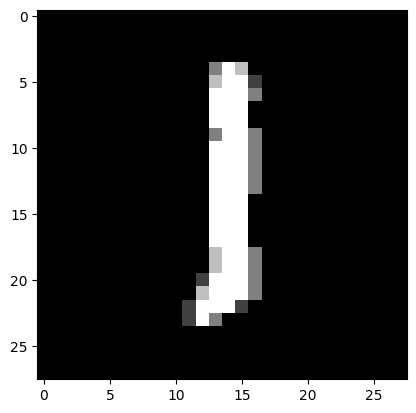

In [35]:
index = 14
plt.imshow(x_test[index], cmap='gray')
np.argmax(model_mnist.predict(np.array([x_test[index]/255])))

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy

# Charger MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normaliser
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode les labels
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Construire ton modèle
model = Sequential([
    Flatten(input_shape=(28, 28)),    # Flatten directement
    Dense(128, activation='relu'),    # Dense + ReLU
    Dense(10),                        # Dense sans activation
])

# Compiler
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),  # Descente de gradient simple
    loss=CategoricalCrossentropy(from_logits=True),        # Important: logits=True car pas de softmax
    metrics=['accuracy']
)

# Entraîner
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


c:\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8414 - loss: 0.5764 - val_accuracy: 0.9348 - val_loss: 0.2253
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9403 - loss: 0.2104 - val_accuracy: 0.9538 - val_loss: 0.1618
Epoch 3/20
340/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9546 - loss: 0.1566

KeyboardInterrupt: 